# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Julian Enrique Espinoza Valenzuela

- ID: A01254679

- My carreer: ITC


# Importing libraries

In [94]:
# Import the packages that we will be using
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/MyDrive/Semana_tec_1/TC1002S/Evidencia/"

else:
    # Define path del proyecto
    Ruta            = ""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Dataset url
url = Ruta + "A01254679_X.csv"

# PART 1
# Use your assigned dataset

## A1 Load data

In [ ]:
# Load the dataset
dataset = pd.read_csv(url)

df= pd.DataFrame(dataset)
df

,Unnamed: 0,x1,x2,x3
0,0,9.994136,8.132179,1.451644
1,1,3.378417,2.731531,-7.278363
2,2,5.025678,-8.010977,-0.963811
3,3,11.378559,6.748951,0.506431
4,4,7.680840,3.272841,-6.859924
...,...,...,...,...
313,313,3.011441,-10.407987,0.544145
314,314,4.144111,1.905058,-6.825925
315,315,7.498220,6.517500,-0.367386
316,316,1.336973,-7.188961,-1.436209


## A2 Data managment


Print the first 7 rows

In [ ]:
print(df.head(7))

   Unnamed: 0         x1        x2        x3
0           0   9.994136  8.132179  1.451644
1           1   3.378417  2.731531 -7.278363
2           2   5.025678 -8.010977 -0.963811
3           3  11.378559  6.748951  0.506431
4           4   7.680840  3.272841 -6.859924
5           5   7.649796 -9.818142  0.747398
6           6   6.554900  0.447994  1.191863


Print the last 4 rows

In [ ]:
print(df.tail(4))

     Unnamed: 0        x1        x2        x3
314         314  4.144111  1.905058 -6.825925
315         315  7.498220  6.517500 -0.367386
316         316  1.336973 -7.188961 -1.436209
317         317  4.148909 -7.606236  3.191236


How many rows and columns are in your data?

Use the `shape` method


In [ ]:
print(df.shape)

(318, 4)


Print the name of all columns

Use the `columns` method

In [ ]:
df.columns

Index(['Unnamed: 0', 'x1', 'x2', 'x3'], dtype='object')

What is the data type in each column

Use the `dtypes` method

In [ ]:
df.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
x3            float64
dtype: object

What is the meaning of rows and columns?

In [ ]:
# Your responses here
#In the DataFrame provided by the professor, we can observe four main columns. Firstly, we have a column that, while not named, we can interpret as simply being there so that each record has a unique identifier within this same DataFrame.
#On the other hand, we have three other columns: x1, x2, and x3. In these, we can observe that each one has a total of 318 quantitative records, which can be more precisely described as floating point numbers.


**NOTE:  Before proceeding, I’m going to filter the dataframe to only keep the x1, x2, and x3 columns. this is because for my future calculations, i don’t really need the first column and it could potentially complicate or impact these calculations.**

In [70]:
interest_col = ["x1","x2","x3"]
filtered_df = df[interest_col]
print(filtered_df)

            x1         x2        x3
0     9.994136   8.132179  1.451644
1     3.378417   2.731531 -7.278363
2     5.025678  -8.010977 -0.963811
3    11.378559   6.748951  0.506431
4     7.680840   3.272841 -6.859924
..         ...        ...       ...
313   3.011441 -10.407987  0.544145
314   4.144111   1.905058 -6.825925
315   7.498220   6.517500 -0.367386
316   1.336973  -7.188961 -1.436209
317   4.148909  -7.606236  3.191236

[318 rows x 3 columns]


Print a statistical summary of your columns


In [71]:
filtered_df.describe()

,x1,x2,x3
count,318.000000,318.000000,318.000000
mean,6.899531,0.133421,-1.887658
std,2.476175,6.039581,4.001325
min,-1.427149,-13.866084,-11.810009
25%,5.144438,-5.234239,-4.686789
50%,6.917295,0.971917,-0.841190
75%,8.603281,4.960276,0.990580
max,13.880713,10.958015,5.594729


In [72]:
# 1) What is the minumum and maximum values of each variable
#x1: minimum value: -1.427149             max value: 13.880713
#x2: minimum value: -13.866084            max value: 10.958015
#x3: minimum value: -11.810009            max value: 5.594729

# 2) What is the mean and standar deviation of each variable
#x1: mean: 6.899531             standard desviation: 2.476175
#x2: mean: 0.133421	            standard desviation: 6.039581
#x3: mean: -1.887658            standard desviation: 4.001325

# 3) What the 25%, 50% and 75% represent?
#25%: This percentage indicates, according to the number shown in each column, that 25% of the data falls below that number. For example, in the x1 column, 25% is equal to 5.144438. This tells us that 25% of the data is equal to or below that number.
#50%: This percentage indicates, according to the number shown in each column, that 50% of the data falls below that number. For example, in the x1 column, 50% is equal to 6.917295. This tells us that 50% of the data is equal to or below that number.
#75%: This percentage indicates, according to the number shown in each column, that 75% of the data falls below that number. For example, in the x1 column, 75% is equal to 8.603281. This tells us that 75% of the data is equal to or below that number.

Rename the columns using the same name with capital letters

In [73]:
filtered_df.columns = filtered_df.columns.str.upper()
print(filtered_df)

            X1         X2        X3
0     9.994136   8.132179  1.451644
1     3.378417   2.731531 -7.278363
2     5.025678  -8.010977 -0.963811
3    11.378559   6.748951  0.506431
4     7.680840   3.272841 -6.859924
..         ...        ...       ...
313   3.011441 -10.407987  0.544145
314   4.144111   1.905058 -6.825925
315   7.498220   6.517500 -0.367386
316   1.336973  -7.188961 -1.436209
317   4.148909  -7.606236  3.191236

[318 rows x 3 columns]


Rename the columns to their original names

In [74]:
filtered_df.columns = filtered_df.columns.str.lower()
print(filtered_df)

            x1         x2        x3
0     9.994136   8.132179  1.451644
1     3.378417   2.731531 -7.278363
2     5.025678  -8.010977 -0.963811
3    11.378559   6.748951  0.506431
4     7.680840   3.272841 -6.859924
..         ...        ...       ...
313   3.011441 -10.407987  0.544145
314   4.144111   1.905058 -6.825925
315   7.498220   6.517500 -0.367386
316   1.336973  -7.188961 -1.436209
317   4.148909  -7.606236  3.191236

[318 rows x 3 columns]


Use two different alternatives to get one of the columns

In [75]:
# 1)
column1 = filtered_df['x1']
print(column1)
# 2)
column2 = filtered_df.x1
print(column2)

0       9.994136
1       3.378417
2       5.025678
3      11.378559
4       7.680840
         ...    
313     3.011441
314     4.144111
315     7.498220
316     1.336973
317     4.148909
Name: x1, Length: 318, dtype: float64
0       9.994136
1       3.378417
2       5.025678
3      11.378559
4       7.680840
         ...    
313     3.011441
314     4.144111
315     7.498220
316     1.336973
317     4.148909
Name: x1, Length: 318, dtype: float64


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [76]:
slice_df = filtered_df.iloc[61:72, 1:3]
print(slice_df)

           x2         x3
61   9.170740   2.678534
62   2.899391  -7.614021
63  -6.361093   0.037039
64   0.068696   1.337539
65  -1.442463  -0.906270
66  -9.340898  -0.836231
67 -10.989257  -5.688050
68  -2.800585   3.090907
69   4.648698 -10.318476
70 -10.117718   2.077315
71 -10.351203  -0.722639


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [77]:
#Second column
null_values_x2 = filtered_df.iloc[:, 1].isnull().sum()
non_null_values_x2 = filtered_df.iloc[:, 1].notnull().sum()
print("--Second column:")
print("Sum of null values:")
print(null_values_x2)
print("Sum of not null values:")
print(non_null_values_x2)
#Third column
null_values_x3 = filtered_df.iloc[:, 2].isnull().sum()
non_null_values_x3 = filtered_df.iloc[:, 2].notnull().sum()
print("--Third column:")
print("Sum of null values:")
print(null_values_x3)
print("Sum of not null values:")
print(non_null_values_x3)

if null_values_x2 + non_null_values_x2 == len(filtered_df):
    print("Sum of null and non-null values for the second column equals total number of rows.")
else:
    print("Error: Sum of null and non-null values for the second column doesn't equal total number of rows.")

if null_values_x3 + non_null_values_x3 == len(filtered_df):
    print("Sum of null and non-null values for the third column equals total number of rows.")
else:
    print("Error: Sum of null and non-null values for the third column doesn't equal total number of rows.")


--Second column:
Sum of null values:
0
Sum of not null values:
318
--Third column:
Sum of null values:
0
Sum of not null values:
318
Sum of null and non-null values for the second column equals total number of rows.
Sum of null and non-null values for the third column equals total number of rows.


Discard the last column


In [78]:
interest_col = ["x1","x2"]
filtered_df_2 = df[interest_col]
print(filtered_df_2)


            x1         x2
0     9.994136   8.132179
1     3.378417   2.731531
2     5.025678  -8.010977
3    11.378559   6.748951
4     7.680840   3.272841
..         ...        ...
313   3.011441 -10.407987
314   4.144111   1.905058
315   7.498220   6.517500
316   1.336973  -7.188961
317   4.148909  -7.606236

[318 rows x 2 columns]


### Questions

Based on the previos results, provide a description of yout dataset

Your response:




## A3 Data visualization

Plot in the same figure the histogram of two variables



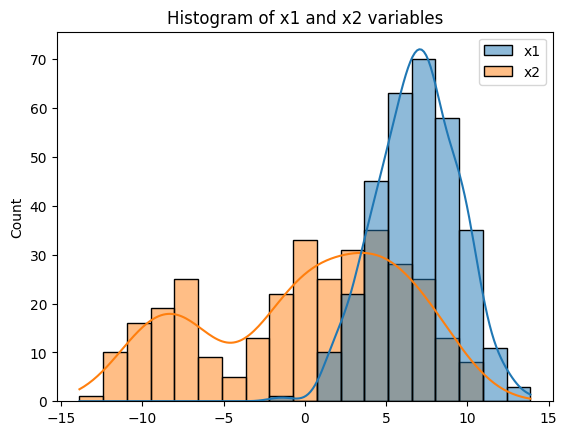

In [79]:
df4plot = filtered_df[["x1","x2"]]
sns.histplot(df4plot, kde=True)
plt.title('Histogram of x1 and x2 variables')
plt.show()


Based on these plots, provide a description of your data:

Your response here:

According to the histogram, we can interpret that the records with data between 5 and 9.8 in the x1 column have a predominant appearance in this same column. Approximately 185 of the 319 records have data within this numerical range.

On the other hand, we can mention with respect to the x2 column that most of its data are found within the following value ranges: between -10 and -7, and between -2 and 6.5.


Plot in the same figure the boxplot of two variables

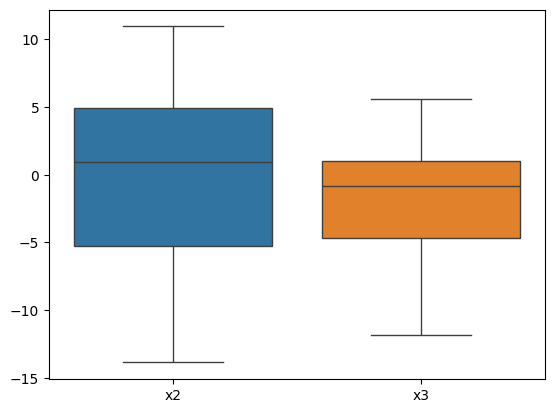

In [89]:
sns.boxplot(data=filtered_df[['x2', 'x3']])
plt.show()

Plot the scatter plot of two variables

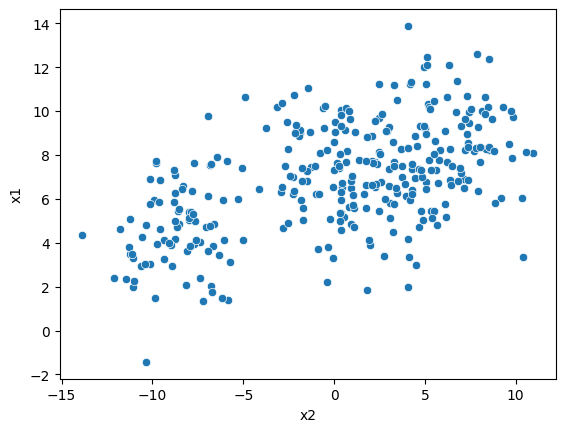

In [88]:
sns.scatterplot(data=filtered_df, y = "x1", x="x2")
plt.show()

### Questions

Based on the previos plots, provide a description of yout dataset

Your response:

Based on the analysis of the previously obtained graphs, we can highlight the following:

1) The mean of the data entered in the columns x1, x2, and x3 are respectively: 6.7, between 0.1 and 0.5, and finally between -1.5 and -1.

2) In the columns x1, x2, and x3, you can obtain the following maximum and minimum values:

x1: minimum value: -1.427149, maximum value: 13.880713

x2: minimum value: -13.866084, maximum value: 10.958015

x3: minimum value: -11.810009, maximum value: 5.594729

These types of graphs are extremely useful as they graphically and understandably display the data contained in your DataFrame and how these data behave within it.


## A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

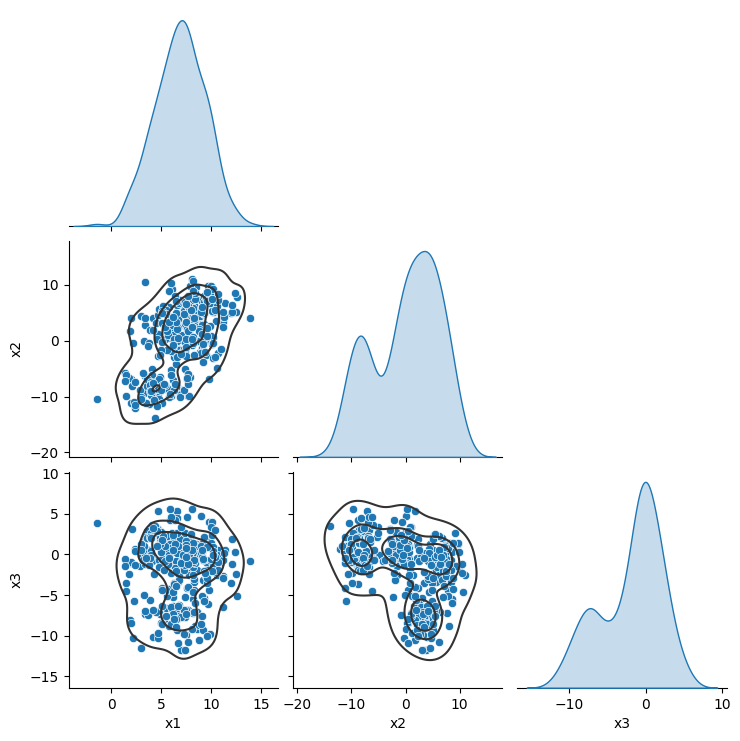

In [91]:
g = sns.pairplot(filtered_df, corner =True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

In [92]:
filtered_df

,x1,x2,x3
0,9.994136,8.132179,1.451644
1,3.378417,2.731531,-7.278363
2,5.025678,-8.010977,-0.963811
3,11.378559,6.748951,0.506431
4,7.680840,3.272841,-6.859924
...,...,...,...
313,3.011441,-10.407987,0.544145
314,4.144111,1.905058,-6.825925
315,7.498220,6.517500,-0.367386
316,1.336973,-7.188961,-1.436209


In [121]:
K  = 3

km = KMeans(n_clusters=K, n_init="auto")

yestimated = km.fit_predict(filtered_df)

yestimated

array([1, 0, 2, 1, 0, 2, 1, 2, 2, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 1, 0, 2,
       0, 2, 2, 2, 2, 1, 0, 1, 1, 0, 1, 1, 0, 2, 2, 1, 0, 1, 0, 2, 1, 1,
       2, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 1, 2, 1, 0,
       0, 2, 1, 0, 1, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 1, 1,
       1, 0, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 0, 0, 2, 1,
       1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 0, 0, 1, 2, 0, 2, 0, 2,
       1, 1, 1, 0, 2, 1, 2, 1, 0, 1, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 1, 2, 1, 1, 0, 2, 1, 0, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2,
       0, 1, 1, 1, 0, 0, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 1, 0, 1, 0, 0, 2,
       2, 1, 0, 0, 2, 2, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 2, 1, 0, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 0, 2, 1, 0, 1, 0, 1, 1,

Add to your dataset a column with the estimated cluster to each data point

In [122]:
filtered_df['yestimated'] = yestimated

filtered_df

,x1,x2,x3,yestimated
0,9.994136,8.132179,1.451644,1
1,3.378417,2.731531,-7.278363,0
2,5.025678,-8.010977,-0.963811,2
3,11.378559,6.748951,0.506431,1
4,7.680840,3.272841,-6.859924,0
...,...,...,...,...
313,3.011441,-10.407987,0.544145,2
314,4.144111,1.905058,-6.825925,0
315,7.498220,6.517500,-0.367386,1
316,1.336973,-7.188961,-1.436209,2


Print the number associated to each cluster

In [123]:
# Get a dataframe with the data of each clsuter
df0 = filtered_df[filtered_df.yestimated==0]
df1 = filtered_df[filtered_df.yestimated==1]
df2 = filtered_df[filtered_df.yestimated==2]


# Number of points in cluster 0
NpointsCluster0 = df0.shape[0]
NpointsCluster1 = df1.shape[0]
NpointsCluster2 = df2.shape[0]

# Print
print("Number of points in clusters 0: " + str(NpointsCluster0) )
print("Number of points in clusters 1: " + str(NpointsCluster1) )
print("Number of points in clusters 02: " + str(NpointsCluster2) )

# Print total number of points
print("Total Number of points in the clusters: " + str(NpointsCluster0+NpointsCluster1+NpointsCluster2) )

Number of points in clusters 0: 89
Number of points in clusters 1: 130
Number of points in clusters 02: 99
Total Number of points in the clusters: 318


Print the centroids

In [124]:
# Assuming X is your data and n_clusters is the number of clusters
kmeans = KMeans(n_clusters=K, random_state=0).fit(filtered_df)

# Print the centroids
print(kmeans.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 6.73717908  3.57446214 -7.39993746  0.        ]
 [ 8.38243299  3.32249356 -0.06164365  1.05109489]
 [ 4.8483555  -7.94435787  0.72569821  2.        ]]


Print the intertia metric

In [125]:
km.inertia_

5664.151325595127

Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

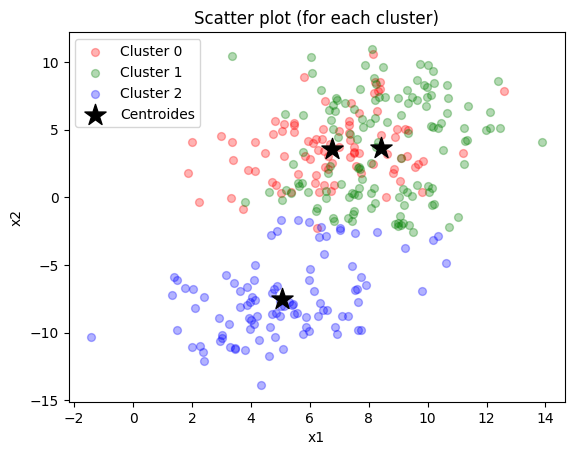

In [126]:
# Get a dataframe with the data of each clsuter
df1 = filtered_df[filtered_df.yestimated==0]
df2 = filtered_df[filtered_df.yestimated==1]
df3 = filtered_df[filtered_df.yestimated==2]

# Scatter plot of each cluster
plt.scatter(df1.x1, df1.x2, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2.x1, df2.x2, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df3.x1, df3.x2, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

# Plot centrodides
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Scatter plot (for each cluster)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

### Questions

Provides a detailed description of your results

Your response:

After having carried out the Kmeans algorithm with 3 clusters on the provided dataframe, I can interpret that a distinct grouping is really carried out among the data stored in the dataframe.

Although, at this moment we cannot draw concise conclusions about the interpretation of this Kmeans, because we have limited knowledge of the meaning of each column within our dataframe. What we can do is reason that the data contained in our dataframe has a behavior that promotes its grouping into three different groups or clusters.

## A5 Elbow plot

Compute the Elbow plot

In [114]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(filtered_df[['x1','x2','x3']])
    # Save sse for each k
    sse.append(km.inertia_)


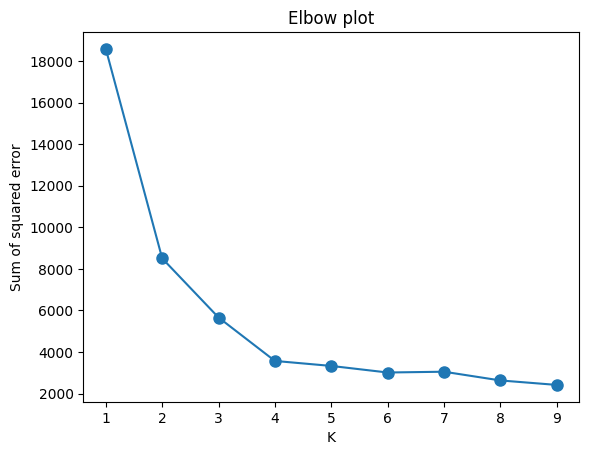

In [115]:
# Plot sse versus k
plt.plot(k_rng,sse, 'o-', markersize=8)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

### Questions

What is the best number of clusters K? (argue your response)

Your response:

Thanks to the elbow plot, we can understand that even though we have a relatively small sum of squared errors after forming 4 clusters, having many clusters is not always the best approach. Therefore, even though using 4 clusters results in a smaller squared error, considering that we have three variables in our dataframe, I believe that the most appropriate number of clusters is 3.

Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response:

Yes, when I included the number of clusters in my Kmeans calculation, I considered the data contained within my dataframe.



# PART 2
# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:

I believe my level of achievement regarding this sub-competency is quite satisfying. This is because, during this semana Tec, I developed a broad understanding of data interpretation in various problems or situations. Therefore, I can say that I developed or refined my ability to analyze and understand datasets.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:


I believe my level of achievement regarding this sub-competency is quite satisfying. This is because, I expanded my knowledge about tools like pandas, seaborn, matplotlib, sklearn, etc. These tools can be extremely helpful when I need to analyze data to reach important and fundamental conclusions.